In [ ]:
!pip install gurobipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.5 MB 16.7 MB/s 


In [ ]:
import numpy as np
import gurobipy as gp
import pandas as pd
from google.colab import files
uploaded = files.upload() #Please upload ROI_data.csv and roi_mat.csv
%matplotlib inline

Saving ROI_data.csv to ROI_data.csv
Saving roi_mat.csv to roi_mat.csv


In [ ]:
# objective arrays defined here
df = pd.read_csv("ROI_data.csv",index_col="Platform")
obj1 = np.array(df.iloc[0])
obj2 = np.array(df.iloc[1])
print(obj1)
print(obj2)

[0.031 0.049 0.024 0.039 0.016 0.024 0.046 0.026 0.033 0.044]
[0.049 0.023 0.024 0.039 0.044 0.046 0.026 0.019 0.037 0.026]


### **Task 1 - Task 3**

Using the ROI data provided by a consulting firm to optimize the marketing budget allocation

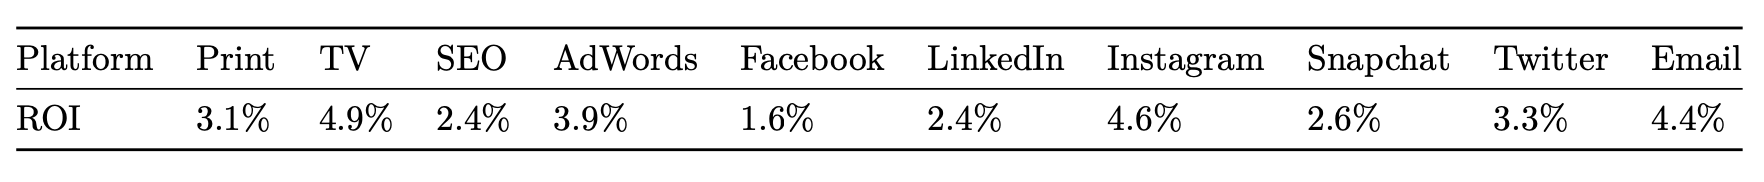

In [ ]:
print(obj1)

[0.031 0.049 0.024 0.039 0.016 0.024 0.046 0.026 0.033 0.044]


#### **Formulating Marketing Budget Allocation Strategy**

Assuming that the optimal investment in each marketing channel is as follows:



*   **p** : amount in millions invested in Print
*   **tv** : amount in millions invested in TV
*   **s** : amount in millions invested in SEO
*   **a** : amount in millions invested in AdWorks
*   **f** : amount in millions invested in Facebook
*   **l** : amount in millions invested in LinkedIn
*   **i** : amount in millions invested in Instagram
*   **s** : amount in millions invested in Snapchat
*   **t** : amount in millions invested in Twitter
*   **e** : amount in millions invested in Email




**Converting the problem into inequalities in linear programming to solve through Gurobi**

In [ ]:
# initialize constraint matrix
A1 = np.zeros((13,10)) 

#Constraints
A1[0,0:10] = 1                        # total investment constraint
A1[1,:] = [1,1,0,0,-1,0,0,0,0,-1]    # constraint in 2.a.
A1[2,:] = [0,0,-2,-2,1,1,1,1,1,0]    # constraint in 2.b.
A1[3:13,0:10] = np.diag(np.ones(10)) # total investment in each channel constraint

# limits on total investment and other constraints for individual investments in each channel
b1 = np.zeros((13,1))
b1[0]=10
b1[3:13]=3 

#Inequalities sign for each constraint
sense = np.array(['<','<','>','<','<','<','<','<','<','<','<','<','<'])

**Finding optimized values for investment in each channel**

In [ ]:
BudgetModel1 = gp.Model() # initialize an empty model

BudgetModX1 = BudgetModel1.addMVar(len(obj1)) # tell the model how many variables there are
# must define the variables before adding constraints because variables go into the constraints
BudgetModCon1 = BudgetModel1.addMConstrs(A1, BudgetModX1, sense, b1) # add the constraints to the model
BudgetModel1.setMObjective(None,obj1,0,sense=gp.GRB.MAXIMIZE) # Ask Gurobi to Maximize the objective 

BudgetModel1.Params.OutputFlag = 0 
BudgetModel1.Params.TimeLimit = 3600

Restricted license - for non-production use only - expires 2023-10-25


In [ ]:
BudgetModel1.optimize() # solve the LP

In [ ]:
BudgetModel1.objVal # optimal ROI level

0.45600000000000007

In [ ]:
BudgetModX1.x

array([0., 3., 0., 1., 0., 0., 3., 0., 0., 3.])

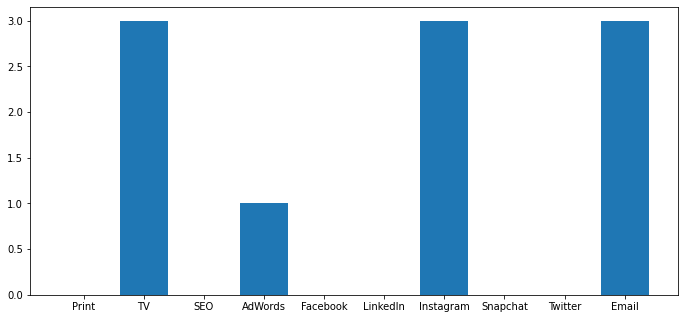

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1])
channels = ['Print', 'TV', 'SEO', 'AdWords', 'Facebook', 'LinkedIn',
       'Instagram', 'Snapchat', 'Twitter', 'Email']
allocations = BudgetModX1.x
ax.bar(channels,allocations)
plt.show()

This shows that an investment of 10 million will give an ROI of 0.456 million (i.e) 4.56% when the investment is in the proportions of 0 (print), 3 million (TV), 0 (Seo), 1 million (AdWorks), 0 (Facebook), 0 (LinkedIn), 3 million (Instagram) , 0 (Snapchat), 0 (Twitter) and 3 million (Email).

### **Task 4**

Using the ROI data from the second consulting firm to optimize the budget allocation
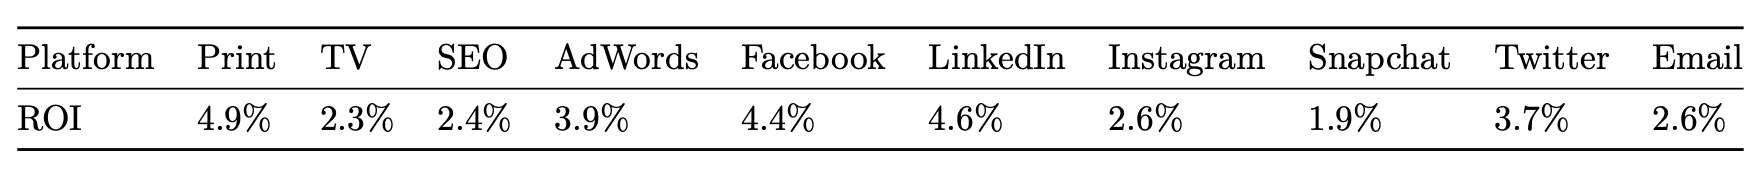

In [ ]:
print(obj2)

[0.049 0.023 0.024 0.039 0.044 0.046 0.026 0.019 0.037 0.026]


**Converting the problem into inequalities in linear programming to solve through Gurobi**

In [ ]:
# initialize constraint matrix
A2 = np.zeros((13,10)) 

#Constraints
A2[0,0:10] = 1                        # total investment constraint
A2[1,:] = [1,1,0,0,-1,0,0,0,0,-1]    # constraint in 2.a.
A2[2,:] = [0,0,-2,-2,1,1,1,1,1,0]    # constraint in 2.b.
A2[3:13,0:10] = np.diag(np.ones(10)) # total investment in each channel constraint

# limits on total investment and other constraints for individual investments in each channel
b2 = np.zeros((13,1))
b2[0]=10
b2[3:13]=3 

#Inequalities sign for each constraint
sense = np.array(['<','<','>','<','<','<','<','<','<','<','<','<','<'])

**Finding optimized values for investment in each platform**

In [ ]:
BudgetModel2 = gp.Model() # initialize an empty model

BudgetModX2 = BudgetModel2.addMVar(len(obj2)) # tell the model how many variables there are
# must define the variables before adding constraints because variables go into the constraints
BudgetModCon2 = BudgetModel2.addMConstrs(A2, BudgetModX2, sense, b2) # add the constraints to the model
BudgetModel2.setMObjective(None,obj2,0,sense=gp.GRB.MAXIMIZE) # Ask Gurobi to Maximize the objective 

BudgetModel2.Params.OutputFlag = 0 
BudgetModel2.Params.TimeLimit = 3600

In [ ]:
BudgetModel2.optimize() # solve the LP

In [ ]:
BudgetModel2.objVal # optimal ROI level

0.45600000000000007

In [ ]:
BudgetModX2.x

array([3., 0., 0., 1., 3., 3., 0., 0., 0., 0.])

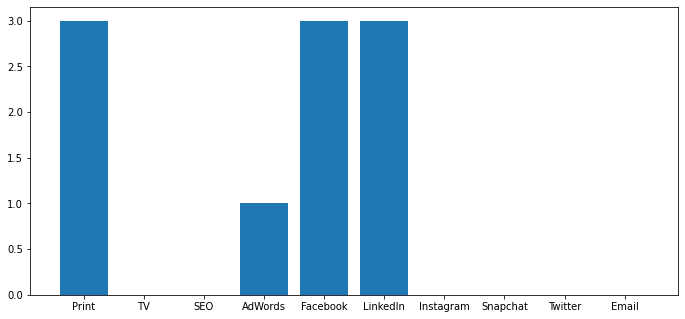

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1])
channels_2 = ['Print', 'TV', 'SEO', 'AdWords', 'Facebook', 'LinkedIn',
       'Instagram', 'Snapchat', 'Twitter', 'Email']
allocations_2 = BudgetModX2.x
ax.bar(channels_2,allocations_2)
plt.show()

This shows that an investment of 10 million will give an ROI of 0.456 million (i.e) 4.56% when the investment is in the proportions of 3 million (print), 0(TV), 0 (Seo), 1 million (AdWorks), 3 million (Facebook), 3 million (LinkedIn), 0 (Instagram) , 0 (Snapchat), 0 (Twitter) and 0 (Email).

### **Task 5**

**1. Assuming the first ROI data is correct, if you were to use the
second allocation (the allocation that assumed the second ROI data was correct) how much
lower would the objective be relative to the optimal objective (the one that uses the first ROI
data and the first allocation)?**

The allocations are very different when using the two ROI datas mentioned. However, the optimal objective is same for both ROIs : 10.456
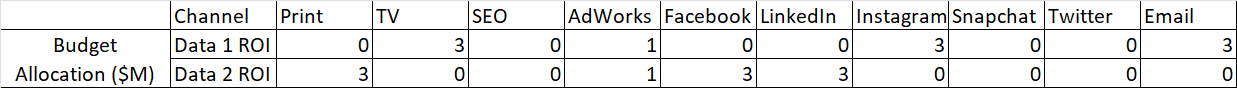


In [ ]:
a = obj1
c = BudgetModX2.x
print('second solution in first roi:', a@c)

print("diff:", BudgetModel1.objVal - a@c)

second solution in first roi: 0.252
diff: 0.20400000000000007


Thus, utilizing the allocation from the second ROI objective in the first ROI objective function leads to total ROI being $0.204M lower, which is a 45% reduction in return 

**2. Assuming the second ROI data is correct, if you used the first
allocation how much lower would the objective be relative to the optimal objective?**

In [ ]:
d = obj2
e = BudgetModX1.x
print('first solution in second roi:', d@e)

print("diff:", BudgetModel2.objVal - d@e)

first solution in second roi: 0.264
diff: 0.19200000000000006


Thus, utilizing the allocation from the first ROI objective in the seocnd ROI objective function leads to total ROI being $0.192M lower, which is a 42% reduction in returns

**3. Do you
think the third constraint above, based on your boss’ experience, is useful?**

Removing the third constraint related to investment limit of 3 million in each platform - Using ROI Function 1

In [ ]:
# initialize constraint matrix
A5_1 = np.zeros((3,10)) 

#Constraints
A5_1[0,0:10] = 1                        # total investment constraint
A5_1[1,:] = [1,1,0,0,-1,0,0,0,0,-1]    # constraint in 2.a.
A5_1[2,:] = [0,0,-2,-2,1,1,1,1,1,0]    # constraint in 2.b.
#A5_1[2:12,0:10] = np.diag(np.ones(10)) # total investment in each channel constraint

# limits on total investment and other constraints for individual investments in each channel
b5_1 = np.zeros((3,1))
b5_1[0]=10

#Inequalities sign for each constraint
sense = np.array(['<','<','>'])

In [ ]:
BudgetModel5_1 = gp.Model() # initialize an empty model

BudgetModX5_1 = BudgetModel5_1.addMVar(len(obj1)) # tell the model how many variables there are
# must define the variables before adding constraints because variables go into the constraints
BudgetModCon5_1 = BudgetModel5_1.addMConstrs(A5_1, BudgetModX5_1, sense, b5_1) # add the constraints to the model
BudgetModel5_1.setMObjective(None,obj1,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model...we'll talk about the None and the 0

BudgetModel5_1.Params.OutputFlag = 0 # tell gurobi to shut up!!
BudgetModel5_1.Params.TimeLimit = 3600

In [ ]:
BudgetModel5_1.optimize() # solve the LP

In [ ]:
BudgetModel5_1.objVal # optimal ROI level

0.46499999999999997

In [ ]:
BudgetModX5_1.x

array([0., 5., 0., 0., 0., 0., 0., 0., 0., 5.])

**Impact on ROI using Data 1:** Removing third constraint increases the  objective ROI to 0.464M which was previosuly at 0.456M, which is approximately a 2% improvement. However, the investment is not as spread out as earlier. We are splitting our money between 2 platforms - TV and Email, making these investments riskier. 
In other words, the 3M constraint is just a way to curtail risk while diversifying your portfolio and hence, it makes sense to keep it, especially considering how overall ROI growth of 2% is not extremely a worthy tradeoff for the risk it brings with it.

Removing the third constraint related to investment limit of 3 million in each platform - Using ROI Function 2

In [ ]:
# initialize constraint matrix
A5_2 = np.zeros((3,10)) 

#Constraints
A5_2[0,0:10] = 1                        # total investment constraint
A5_2[1,:] = [1,1,0,0,-1,0,0,0,0,-1]    # constraint in 2.a.
A5_2[2,:] = [0,0,-2,-2,1,1,1,1,1,0]    # constraint in 2.b.
#A5_2[2:12,0:10] = np.diag(np.ones(10)) # total investment in each channel constraint

# limits on total investment and other constraints 
b5_2 = np.zeros((3,1))
b5_2[0]=10

#Inequalities sign for each constraint
sense = np.array(['<','<','>'])

In [ ]:
BudgetModel5_2 = gp.Model() # initialize an empty model

BudgetModX5_2 = BudgetModel5_2.addMVar(len(obj2)) # tell the model how many variables there are
# must define the variables before adding constraints because variables go into the constraints
BudgetModCon5_2 = BudgetModel5_2.addMConstrs(A5_2, BudgetModX5_2, sense, b5_2) # add the constraints to the model
BudgetModel5_2.setMObjective(None,obj2,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model...we'll talk about the None and the 0

BudgetModel5_2.Params.OutputFlag = 0 # tell gurobi to shut up!!
BudgetModel5_2.Params.TimeLimit = 3600

In [ ]:
BudgetModel5_2.optimize() # solve the LP

In [ ]:
BudgetModel5_2.objVal # optimal ROI level

0.46499999999999997

In [ ]:
BudgetModX5_2.x

array([5., 0., 0., 0., 5., 0., 0., 0., 0., 0.])

**Impact on ROI using Data 2:** Removing third constraint increases the  objective ROI to 0.464M which was previosuly at 0.456M, which is approximately a 2% improvement. However, the investment is not as spread out as earlier. We are splitting our money between 2 platforms - Print and Facebook, making these investments riskier. 
In other words, the 3M constraint is just a way to curtail risk while diversifying your portfolio and hence, it makes sense to keep it, , especially considering how overall ROI growth of 2% is not extremely a worthy tradeoff for the risk it brings with it.


#Task 6

**To explore this further perform some analysis of how your optimal allocation would change based on changes in the ROI data. Use the first ROI data as your starting point. By how much could each advertising medium’s ROI increase or decrease and still result in the same optimal allocation you found in step (3)?**

In [ ]:
# Pulling up the variables from Task 3

BudgetModX1.SAObjLow #Lower bound of objective function where optimal corner doesn't change

array([ -inf, 0.039,  -inf, 0.033,  -inf,  -inf, 0.039,  -inf,  -inf,
       0.029])

In [ ]:
BudgetModX1.SAObjUp #Upper bound of objective function where optimal corner doesn't change

array([0.049, 0.062, 0.039, 0.046, 0.029, 0.039,   inf, 0.039, 0.039,
         inf])

In [ ]:
obj_low_and_up = pd.DataFrame()
obj_low_and_up['channel'] = ['Print', 'TV', 'SEO', 'AdWords', 'Facebook', 'LinkedIn',
       'Instagram', 'Snapchat', 'Twitter', 'Email']
obj_low_and_up['lower'] = list(BudgetModX1.SAObjLow)
obj_low_and_up['upper'] = list(BudgetModX1.SAObjUp)
obj_low_and_up

,channel,lower,upper
0,Print,-inf,0.049
1,TV,0.039,0.062
2,SEO,-inf,0.039
3,AdWords,0.033,0.046
4,Facebook,-inf,0.029
5,LinkedIn,-inf,0.039
6,Instagram,0.039,inf
7,Snapchat,-inf,0.039
8,Twitter,-inf,0.039
9,Email,0.029,inf


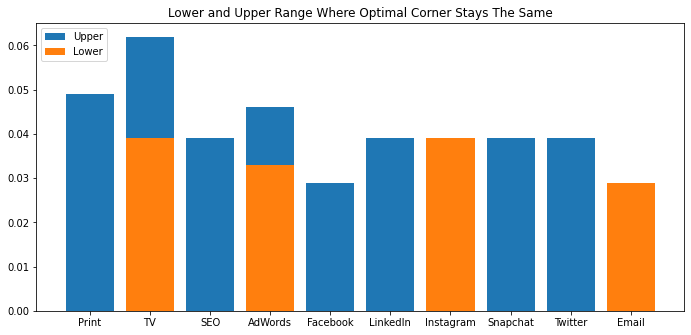

In [ ]:
import matplotlib.pyplot as plt

fig3 = plt.figure()
ax = fig3.add_axes([0,0,1.5,1])
channels_3 = ['Print', 'TV', 'SEO', 'AdWords', 'Facebook', 'LinkedIn',
       'Instagram', 'Snapchat', 'Twitter', 'Email']
allocations_3 = BudgetModX1.SAObjUp
allocations_4 = BudgetModX1.SAObjLow
ax.bar(channels_3,allocations_3, label = "Upper")
ax.bar(channels_3, allocations_4, label = "Lower")
ax.set_title("Lower and Upper Range Where Optimal Corner Stays The Same")
plt.legend()
plt.show()

#Task 7

Your boss has gained permission to reinvest half of the return. For example, if the marketing
obtains a 4% return in January, the budget of February will be $10M + $10M × 4% × 50% =
$10.2M. The monthly ROI for next year is given in Project1.Rdata. The three constraints given
by your boss are still in place for each month. What is the optimal allocation for each month?

In [ ]:
roi_mat = pd.read_csv('roi_mat.csv')
roi_mat.set_index('Unnamed: 0',inplace=True)
roi_mat.index.names = ['Month']
roi_mat

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
Month,,,,,,,,,,
January,4.0,3.6,2.4,3.9,3.0,3.5,3.6,2.25,3.5,3.5
February,4.0,3.9,2.7,3.8,4.3,3.2,2.7,1.80,3.7,3.5
March,3.5,2.9,3.1,3.8,2.4,4.1,3.7,2.60,4.2,2.5
April,3.8,3.1,2.4,4.4,2.4,3.8,3.7,2.50,3.6,2.9
May,3.5,3.2,1.9,3.4,2.7,2.7,3.9,2.20,4.5,3.9
June,4.0,3.2,2.7,3.4,3.4,3.0,4.5,2.10,3.8,4.1
July,3.9,3.6,2.0,4.4,3.9,3.7,4.3,1.80,4.0,3.8
August,4.2,3.3,2.8,4.2,2.0,3.7,3.6,1.50,4.4,4.3
September,4.1,2.8,2.5,4.2,2.9,3.7,2.8,2.50,4.0,3.4


In [ ]:
# Initialise variables for use inside the loop
returns = []
total_budget = []
opt_allocation = []
opt_val = []

# Write a loop to iterate through monthly ROI functions
for i in range(len(roi_mat)):
    obj = np.array(roi_mat.iloc[i])/100 #convert percent to decimal

    # If it's January, total budget would be 10M.
    # Otherwise, it would be 10M + 50% of the returns*10M
    if i==0: 
        ttl_budget = 10
    else:
        ttl_budget = 10 + (10*returns[i-1]*0.5)

    # Add ttl_budget to this list with monthly budgets
    total_budget.append(ttl_budget)

    # Initialise constraint matrix & add constaints
    A = np.zeros((13,10)) 
    A[0,:] = [1,1,1,1,1,1,1,1,1,1] 
    A[1,:] = [1,1,0,0,-1,0,0,0,0,-1] 
    A[2,:] = [0,0,-2,-2,1,1,1,1,1,0]
    A[3:13,:] = np.diag(np.ones(10))

    #Limits on constraints
    b = np.array([ttl_budget,0,0,3,3,3,3,3,3,3,3,3,3]) 
    sense = np.array(['<','<','>','<','<','<','<','<','<','<','<','<','<']) 

    #Run the model for given month
    BudgModel = gp.Model() 
    BudgModX = BudgModel.addMVar(len(obj)) 
    BudgModCon = BudgModel.addMConstrs(A,BudgModX,sense,b) 
    BudgModel.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE) 
    BudgModel.Params.OutputFlag = 0 
    BudgModel.Params.TimeLimit = 3600 
    BudgModel.optimize()   

    # Store results 
    obj_val = BudgModel.objVal
    roi_soln = BudgModX.x
    prev_obj = obj

    # Append returns for each month: Returns = ROI for month/ Total budget for the month
    returns.append(obj_val/total_budget[i])

    # Append objective solutions(decision variable) for each month 
    opt_allocation.append(roi_soln)

    # Append objective value for each month 
    opt_val.append(obj_val)

**Optimal Allocation for each Month is shown below:**

In [ ]:
# Print solutions for each month
for i in range(len(opt_allocation)):
  print(roi_mat.index[i])
  print(opt_allocation[i])
  print('\n')

January
[3.         0.         0.         1.33333333 0.         0.
 2.66666667 0.         0.         3.        ]


February
[3.     0.     0.     2.3955 3.     0.     0.     0.     1.791  0.    ]


March
[0.         0.         0.         3.         0.         3.
 1.19942866 0.         3.         0.        ]


April
[0.         0.         0.         3.         0.         3.
 3.         0.         1.19970671 0.        ]


May
[1.19617694 0.         0.         0.         0.         0.
 3.         0.         3.         3.        ]


June
[3.         0.         0.         0.         0.         0.
 3.         0.         1.20148051 3.        ]


July
[0.        0.        0.        3.        1.2076445 0.        3.
 0.        3.        0.       ]


August
[2.70969487 0.         0.         1.5        0.         0.
 0.         0.         3.         3.        ]


September
[0.60720379 0.         0.         3.         0.         3.
 0.         0.         3.         0.60720379]


October
[0.        

In [ ]:
display(pd.DataFrame(opt_allocation, index = roi_mat.index, columns = roi_mat.columns))

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
Month,,,,,,,,,,
January,3.000000,0.000000,0.0,1.333333,0.000000,0.0,2.666667,0.0,0.000000,3.000000
February,3.000000,0.000000,0.0,2.395500,3.000000,0.0,0.000000,0.0,1.791000,0.000000
March,0.000000,0.000000,0.0,3.000000,0.000000,3.0,1.199429,0.0,3.000000,0.000000
April,0.000000,0.000000,0.0,3.000000,0.000000,3.0,3.000000,0.0,1.199707,0.000000
May,1.196177,0.000000,0.0,0.000000,0.000000,0.0,3.000000,0.0,3.000000,3.000000
June,3.000000,0.000000,0.0,0.000000,0.000000,0.0,3.000000,0.0,1.201481,3.000000
July,0.000000,0.000000,0.0,3.000000,1.207644,0.0,3.000000,0.0,3.000000,0.000000
August,2.709695,0.000000,0.0,1.500000,0.000000,0.0,0.000000,0.0,3.000000,3.000000
September,0.607204,0.000000,0.0,3.000000,0.000000,3.0,0.000000,0.0,3.000000,0.607204


#Task 8

A stable budget is defined as a monthly allocation such that for each platform the monthly
change in spend is no more than $1M. Is the allocation you found stable? If it isn’t, you do not
need to solve a new optimization model. Describe how my might model this?

**Month over Month Variation in Allocation is shown below:**

In [ ]:
# Print MoM values for each month - set to 0 for January by default
diff = [np.zeros(10)]
for j in range(1,12):
    diff.append(opt_allocation[j]-opt_allocation[j-1])

for k in range(len(diff)):
  print(roi_mat.index[k])
  print(diff[k])
  print('\n')

January
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


February
[ 0.          0.          0.          1.06216667  3.          0.
 -2.66666667  0.          1.791      -3.        ]


March
[-3.          0.          0.          0.6045     -3.          3.
  1.19942866  0.          1.209       0.        ]


April
[ 0.          0.          0.          0.          0.          0.
  1.80057134  0.         -1.80029329  0.        ]


May
[ 1.19617694  0.          0.         -3.          0.         -3.
  0.          0.          1.80029329  3.        ]


June
[ 1.80382306  0.          0.          0.          0.          0.
  0.          0.         -1.79851949  0.        ]


July
[-3.          0.          0.          3.          1.2076445   0.
  0.          0.          1.79851949 -3.        ]


August
[ 2.70969487  0.          0.         -1.5        -1.2076445   0.
 -3.          0.          0.          3.        ]


September
[-2.10249108  0.          0.          1.5         0.          3.
  0.          0.      

**There is a change in allocation of 1M or more in atleast one platform each month. Thus, this is not a stable allocation**

In order to make the allocations stable each month, we could need additional constraints that dictate the Month over Month change in allocation is less than 1M.

To be able to do this, we would need to run a new model with 10*12 = 120 decision variables - one for each month-platform combination

**A constraint for month over month change would then look as follows:**

Jan: a1 to a10 for respect platforms where subscript 1 - print, 2 - TV, 3- SEO and so on with 10 being Email.

Feb: b1 to b10 with similar subscripting

We could define similar variables for March to December as well. 

**A MoM constraint would then look as follows:**

Feb MoM: (b1-a1)< 1M, (b2-a2) < 1M ....... (b10-a10) < 1M 
Mar MoM: (c1-b1)< 1M, (c2-b2) < 1M ....... (c10-b10) < 1M

**We could define MoM constraints for March to December as well.** 

What would the total number of constraints be then: 
1. 12 constraints, 1 for each month, restricting total spend to 10M 
2. 12 constraints for Print + TV <= Facebook + Email 
3. 12 constraints for Facebook + LinkedIn + Instagram + Snapchat +  Twitter >= 2 * (AdWords +SEO)
4. 120 constraints for spend on each channel being less than 3M 
5. 110 Month over Month constraints
6. 120 non negativity constraints 

That would be a total of 386 constraints to apply to the new model.





